In [57]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [58]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [59]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [60]:
X_train.shape

(60000, 28, 28)

In [61]:
X_train[0].shape

(28, 28)

In [62]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [63]:
import matplotlib.pyplot as plt

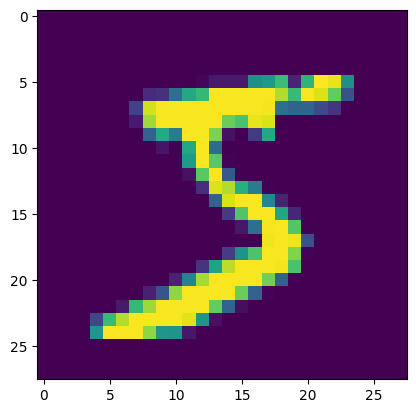

In [64]:
plt.imshow(X_train[0])

In [65]:
model = Sequential()
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128,activation ='relu'))
model.add(Dense(32 ,activation ='relu'))
model.add(Dense(10,activation ='softmax'))

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics =['accuracy'])

In [68]:
history = model.fit(X_train,y_train, epochs =10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.5715 - accuracy: 0.6760 - val_loss: 0.7036 - val_accuracy: 0.7841
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5485 - accuracy: 0.8569 - val_loss: 0.4691 - val_accuracy: 0.8837
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3452 - accuracy: 0.9089 - val_loss: 0.3111 - val_accuracy: 0.9224
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2646 - accuracy: 0.9288 - val_loss: 0.2248 - val_accuracy: 0.9424
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1905 - accuracy: 0.9479 - val_loss: 0.1870 - val_accuracy: 0.9556
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1695 - accuracy: 0.9550 - val_loss: 0.1908 - val_accuracy: 0.9543
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1405 - accuracy: 0.9620 - val_loss: 0.1650 - val_accuracy:

In [69]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [70]:
y_pred = y_prob.argmax(axis =1 )

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.962

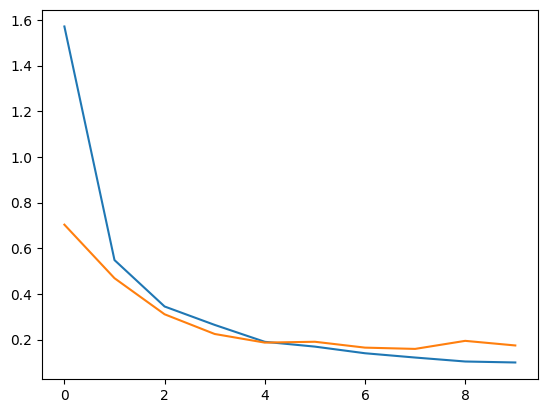

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [74]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([7], dtype=int64)

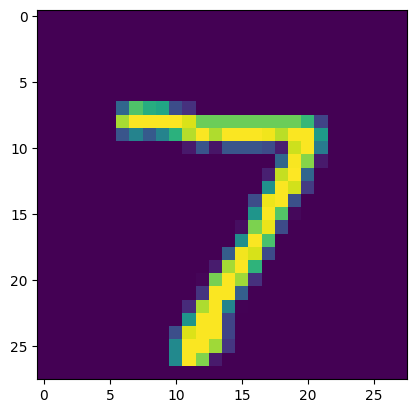

In [75]:
plt.imshow(X_test[0])